## Introduction

For this analysis, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning, so you have a rough sense of where the data come from and how they were generated.

The goal here is to implement some of the basic econometric techniques to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data. The data is actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 'pobre'|
|progresa |treatment = 'basal'|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import operator as op
import statsmodels.formula.api as sm
import sys; print(sys.version)
%matplotlib inline


2.7.13 |Anaconda 4.3.1 (64-bit)| (default, Dec 19 2016, 13:29:36) [MSC v.1500 64 bit (AMD64)]


---
##Part 1: Descriptive analysis

### 1.1	Summary Statistics

a) Present number of missing observations for every single variable


In [72]:
prog_df= pd.read_csv('progresa_sample.csv')
print prog_df.isnull().sum()

year                0
sex                24
indig             300
dist_sec            0
sc               8453
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     210
hohsex             20
hohage             10
age                 0
village             0
folnum              0
grc97               0
sc97             3872
dtype: int64


b) Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name.

In [60]:
prog_com_df = prog_df
prog_com_df = prog_com_df.drop('year',axis=1)
prog_com_df = prog_com_df.drop('folnum', axis=1)
prog_com_df = prog_com_df.drop('village', axis=1)
prog_com_df.describe().loc[['mean','std']].transpose().sort_index()

,mean,std
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male  |?     |?     |?     |?     |


In [154]:
treat_df = prog_df[(prog_df.progresa == 'basal')&(prog_df.year == 97)&(prog_df.poor == 'pobre')]
control_df = prog_df[(prog_df.progresa != 'basal') & (prog_df.year == 97) & (prog_df.poor == 'pobre')]
a = treat_df[treat_df.columns.difference(['year','folnum','village'])]
a = a.describe().loc['mean']
target_df = pd.DataFrame({'Variable name':a.index, 'Average value (Treatment villages)':a.values},
                        columns = ['Variable name','Average value (Treatment villages)'])
target_df

b = control_df[control_df.columns.difference(['year','folnum','village'])]
b = b.describe().loc['mean']
target_df2 = pd.DataFrame({'Variable name':b.index, 'Average value (Treatment villages)':b.values},
                        columns = ['Variable name','Average value (Treatment villages)'])
target_df2

final_df=pd.merge(target_df,target_df2, on = 'Variable name')
final_df


,Variable name,Average value (Treatment villages)_x,Average value (Treatment villages)_y
0,age,10.716991,10.742023
1,dist_cap,150.829074,153.769730
2,dist_sec,2.453122,2.507662
3,fam_n,7.281327,7.302469
4,grc,3.531599,3.543050
5,grc97,3.531599,3.543050
6,hohage,43.648828,44.276918
7,hohedu,2.663139,2.590348
8,hohsex,0.924656,0.922947
9,hohwag,544.339544,573.163558


In [201]:
tcomp = {}
treat_df = treat_df[treat_df.columns.difference(['year','folnum','village', 'poor', 'progresa'])].fillna(0)
control_df = control_df[control_df.columns.difference(['year','folnum','village', 'poor', 'progresa'])].fillna(0)
list_val = list(treat_df)
for x in range(0,len(final_df)):
    tcomp.update({list_val[x]: sp.ttest_ind(treat_df.transpose().iloc[x],control_df.transpose().iloc[x]).pvalue})

tlist_df = pd.DataFrame(list(tcomp.items()), columns = ['Variable name','p-value'])
tlist_df

final_df=pd.merge(final_df,tlist_df, how='left' ,on = 'Variable name')
final_df

,Variable name,Average value (Treatment villages)_x,Average value (Treatment villages)_y,p-value
0,age,10.716991,10.742023,4.785594e-01
1,dist_cap,150.829074,153.769730,8.415005e-04
2,dist_sec,2.453122,2.507662,3.569843e-02
3,fam_n,7.281327,7.302469,4.271039e-01
4,grc,3.531599,3.543050,6.890151e-01
5,grc97,3.531599,3.543050,6.890151e-01
6,hohage,43.648828,44.276918,1.515918e-06
7,hohedu,2.663139,2.590348,1.105093e-02
8,hohsex,0.924656,0.922947,6.217737e-01
9,hohwag,544.339544,573.163558,3.253835e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

A.  Examining the average values of the variables of this experiment for the treatment and control villages we find that there are statistically significant differences between the treatment and control villages at the baseline. Statistical significance is defined based on the p-value i.e. if the p-value is less than 0.05 it means that there is significant difference between treatment and control villages as baseline. And from the above obserb=vations we can see that variables like sex, dist_sec (nearest distance to a secondary school), min_dist (min distance to an urban center), dist_cap (min distance to the capital), hohedu (years of schooling of head of household), hohwag (monthly wages of head of household),hohage (age of head of household), welfare_index (welfare index used to classify poor) have a statistically significant difference.

B. For any comparison, it is required to have the same baseline so as to gauge the actual effect of the treatment, i.e. they should not have statistically singnificant differences in their attributes. But in this case, since the two groups seem to be systematically different even before the treatment we can conclude the randomization was not flaw and not all causal relationships between the treatment and control attributes before and after can be directly attributed to the treatment. Thus difference at baseline impacts the causal analysis of an experiment.

C. Since there is significant difference between several variables of treatment and control groups prior to the treatment, we cannont rely on just the difference of before and after treatment variables to derive any causal effect. To gauge the impact aptly we would have to  fallback on techniques like double difference aka difference in difference.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

    HouseholdEdu  NotEnrolled  Enrolled  EnrollmentRate
0              0       4458.0   15456.0        0.776137
1              1       1180.0    3918.0        0.768537
2              2       2308.0    8926.0        0.794552
3              3       2906.0   11842.0        0.802956
4              4        860.0    4616.0        0.842951
5              5        364.0    2060.0        0.849835
6              6       1270.0    9180.0        0.878469
7              7         38.0     306.0        0.889535
8              8         58.0     522.0        0.900000
9              9        160.0    1974.0        0.925023
10            10         14.0      90.0        0.865385
11            11          2.0      76.0        0.974359
12            12          6.0     346.0        0.982955
13            13          6.0     142.0        0.959459
14            14         10.0      74.0        0.880952
15            15          6.0      54.0        0.900000
16            16          4.0      64.0        0

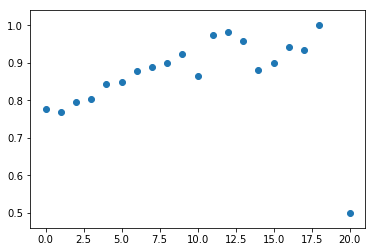

In [103]:
target_df = prog_df.groupby(['hohedu','sc97']).sc97.agg(['count'])
target_df = target_df.unstack('sc97')
target_df = target_df.fillna(0)
target_df = pd.DataFrame(target_df.to_records())
target_df.columns = ['HouseholdEdu', 'NotEnrolled', 'Enrolled']
target_df['EnrollmentRate'] = target_df['Enrolled'] / (target_df['Enrolled'] + target_df['NotEnrolled'])
print target_df
plt.scatter(target_df['HouseholdEdu'],target_df['EnrollmentRate'])

Ans - We see that there is very less representation for group 20 due to which the data is skewed and it doesn't follow the general trend of increasing enrollement based of head of household's education.



### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households).
* Does there appear to be a difference? Is this difference statistically significant?
* Which D estimator in Schultz (2004) does this approach correspond to?

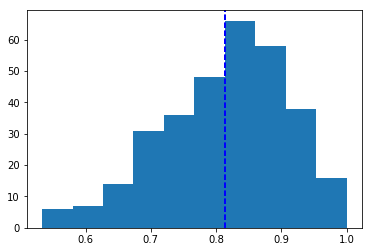

In [110]:
treat_df = prog_df[(prog_df.progresa == 'basal')&(prog_df.year == 97)&(prog_df.poor == 'pobre')]
target_df = treat_df.groupby(['village', 'sc']).sc.agg(['count'])
target_df = target_df.unstack('sc')
target_df = target_df.fillna(0)
target_df = pd.DataFrame(target_df.to_records())
target_df.columns = ['Village', 'NotEnrolled', 'Enrolled']
target_df['EnrollmentRate'] = target_df['Enrolled'] / (target_df['Enrolled'] + target_df['NotEnrolled'])
plt.hist(target_df['EnrollmentRate'])
plt.axvline(target_df['EnrollmentRate'].mean(), color='b', linestyle='dashed', linewidth=2)

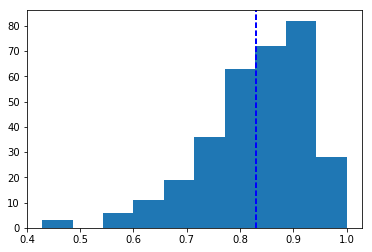

In [111]:
treat_df = prog_df[(prog_df.progresa == 'basal')&(prog_df.year == 98)&(prog_df.poor == 'pobre')]
target_df = treat_df.groupby(['village', 'sc']).sc.agg(['count'])
target_df = target_df.unstack('sc')
target_df = target_df.fillna(0)
target_df = pd.DataFrame(target_df.to_records())
target_df.columns = ['Village', 'NotEnrolled', 'Enrolled']
target_df['EnrollmentRate'] = target_df['Enrolled'] / (target_df['Enrolled'] + target_df['NotEnrolled'])
plt.hist(target_df['EnrollmentRate'])
plt.axvline(target_df['EnrollmentRate'].mean(), color='b', linestyle='dashed', linewidth=2)

Does there appear to be a difference? Is this difference statistically significant?
    From the above histograms we see that the overall mean of the average enrollment rates across villages in 1997 and 1998  was nearly same at around 0.81 and 0.83. From the histograms it looks like there is slight shift in more villages moving higher towards the 0.8 and 0.9 range and less around 0.6 in 1998 as compared to the observed trend of  treatment villages in 1997. And since they mead did seem to have an upwards trend, we can conclude that the differences might be statistically significant by probably a small margin.
    
Which D estimator in Schultz (2004) does this approach correspond to?
    This approach most probably corresponds to DD1(t) estimator of Schultz (page 212) which is the double difference estimator for averages for program groups over time.

## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment).
* calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages.
* Which difference estimator in Schultz (2004) does this approach correspond to?
* Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [219]:
#Enrollment rate for treatment villages
treat_df = prog_df[(prog_df.progresa == 'basal')&(prog_df.year == 98)&(prog_df.poor == 'pobre')]
target_df = treat_df.groupby(['sc']).sc.agg(['count'])
target_df = target_df.fillna(0)
target_df = pd.DataFrame(target_df.to_records())

target_er_treat= target_df.iloc[1]['count'] / (target_df.iloc[0]['count'] + target_df.iloc[1]['count'])
target_er_treat


0.8464791213954308

In [220]:

#Enrollment Rate for control villages
control_df = prog_df[(prog_df.progresa != 'basal')&(prog_df.year == 98)&(prog_df.poor == 'pobre')]
target_df = control_df.groupby(['sc']).sc.agg(['count'])
target_df = target_df.fillna(0)
target_df = pd.DataFrame(target_df.to_records())

target_er_control= target_df.iloc[1]['count'] / (target_df.iloc[0]['count'] + target_df.iloc[1]['count'])
target_er_control

0.807636956730308

In [227]:
sp.ttest_ind(treat_df['sc'].fillna(0),control_df['sc'].fillna(0))

Ttest_indResult(statistic=7.2571906557901364, pvalue=4.0399770903218052e-13)

In [228]:
sp.ttest_ind(control_df['sc'][~np.isnan(control_df['sc'])], treat_df['sc'][~np.isnan(treat_df['sc'])])

Ttest_indResult(statistic=-8.3587205674183735, pvalue=6.636344447523235e-17)

Which difference estimator in Schultz (2004) does this approach correspond to?
    This approach corresponds to the D1(t) estimator of Schultz (page 212) which is the program control difference in outcomes of the test groups.
    
Use a t-test to determine if this difference is statistically significant. What do you conclude?
    We see that the p value is very small and hence the difference is significant aka progresa helped increase the enrollment rate among poor households

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [230]:
Model_Data = prog_df[(prog_df['poor'] == 'pobre') & (prog_df['year'] == 98)]
Model_Data.loc[Model_Data.progresa == 'basal', 'progresa'] = 1
Model_Data.loc[Model_Data.progresa == '0', 'progresa'] = 0

# Simple regression to gauge effect of enrollment rates on treatment assignment
lm = sm.ols(formula='sc ~ progresa', data=Model_Data).fit()
print lm.params
print lm.summary()

C:\Users\Varsha\Anaconda2\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Intercept        0.807637
progresa[T.1]    0.038842
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Sun, 30 Apr 2017   Prob (F-statistic):           6.64e-17
Time:                        19:25:48   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------

Based on this model, how much did Progresa increase the likelihood of a child enrolling? 
    The coefficient of progresa is 0.0388, which means that for a unit increase in progresa variable, the enrollment would increase by 0.0388 percent. A unit increase in progresa would mean more enrollment, which means Progresa increased the liklihood of child enrollment by 0.0388%.

How does your regression estimate compare to your t-test estimate from part 2.1?
    The t-test estimate from 2.1 is in sync with regression model. The regression value calculated for the above model is 0.8076 + 1* 0.0388 = 0.8464 = avg enrollment rate for poor households in treatment villages. Control group, we the regression value would be 0.8076 = avg enrollment rate for poor households in control villages. 

Based on this regression model, can we reject the null hypothesis that the treatment effects are zero?
    Thus based on the results of the regression model, can we reject the null hypothesis - there were no treatment effects since the pvalue for the intercept is less than 0.05. This means the treatment had an effect on the enrollment.
    
What is the counterfactual assumption underlying this regression? 
    The counterfactual assumption underlying this regression is that if there was no treatment, the average enrollment rate for treated and control villages would remain the same and no change would have been observed.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [231]:
multiple_lm = sm.ols(formula='sc ~ progresa + sex + indig + dist_sec + fam_n + min_dist + dist_cap + hohedu + hohwag + welfare_index + age + hohage', data=Model_Data).fit()
multiple_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     849.5
Date:                Sun, 30 Apr 2017   Prob (F-statistic):               0.00
Time:                        21:12:56   Log-Likelihood:                -7541.1
No. Observations:               27263   AIC:                         1.511e+04
Df Residuals:                   27250   BIC:                         1.521e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.4431      0.018     80.855      0.000         1.408     1.478
progresa[T.1]     0.0337      0.004      8.418      0.000         0.026     0.042
sex               0.0304      0.004      7.847      0.000         0.023     0.038
indig             0.0188      0.005      3.961      0.000         0.009     0.028
dist_sec         -0.0106      0.001    -12.012      0.000        -0.012    -0.009
fam_n             0.0006      0.001      0.727      0.467        -0.001     0.002
min_dist          0.0004   6.34e-05      6.326      0.000         0.000     0.001
dist_cap          0.0002    3.7e-05      5.512      0.000         0.000     0.000
hohedu            0.0079      0.001      9.224      0.000         0.006     0.010
hohwag         -7.23e-07   2.81e-06     -0.257      0.797     -6.24e-06  4.79e-06
welfare_index  2.283e-05   1.82e-05      1.253      0.210     -1.29e-05  5.85e-05
age              -0.0657      0.001    -94.750      0.000        -0.067    -0.064
hohage        -2.299e-05      0.000     -0.118      0.906        -0.000     0.000
==============================================================================
Omnibus:                     2940.375   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3992.254
Skew:                          -0.930   Prob(JB):                         0.00
Kurtosis:                       3.237   Cond. No.                     9.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

How do the controls affect the point estimate of treatment effect?
    Introducing the control factors has only changed the point estimate for the treatment effect, decreasing it from 0.0388 in the initial single-linear regression model to 0.0337 in this multiple regression model. We can also see that the intercept value has increased significantly.
    
How do the controls affect the standard error on the treatment effect?
    After adding the control variables, the standard error for treament aka progresa has reduced from 0.005 to 0.004, increasing the model accuracy.
    
How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
    While we see that point estimate has decreased, and intercept value increased considerably the controls did affect the model significantly. Also since in case of multiple regression standard error was lower, model accuracy improved, making it a better model for the given data.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [256]:
prog97 = prog_df[(prog_df['poor'] == 'pobre') & (prog_df['year'] == 97)]
prog98 = prog_df[(prog_df['poor'] == 'pobre') & (prog_df['year'] == 98)]


treat98 = prog98['sc'][prog98.progresa == "basal"].mean() 
treat97 = prog97['sc'][prog97.progresa == "basal"].mean()
control98 =  prog98['sc'][prog98.progresa != "basal"].mean()
control97 =  prog97['sc'][prog97.progresa != "basal"].mean()

did = pd.DataFrame(index = ['Avg Enrollment Before Treatment', 'Avg Enrollment After Treatment','Difference in Difference'],
                           columns = ['Control Group', 'Treatment Group', 'Difference in Difference'])
did.loc["Avg Enrollment Before Treatment","Control Group"] = control97
did.loc["Avg Enrollment After Treatment","Control Group"] = control98
did.loc["Avg Enrollment Before Treatment","Treatment Group"] = treat97
did.loc["Avg Enrollment After Treatment","Treatment Group"] = treat98
did.loc["Difference in Difference","Difference in Difference"] = (treat98 - treat97) - (control98 - control97)
did.fillna('')
did


,Control Group,Treatment Group,Difference in Difference
Avg Enrollment Before Treatment,0.815186,0.822697,
Avg Enrollment After Treatment,0.807637,0.846479,
Difference in Difference,,,0.0313313


What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
    The estimate of the impact using the double difference method resulted in a value of 0.0313313 which is lower compared to the estimate derived from the earlier simple difference method which resulted in 0.0388. But as we know estimate using double difference method is more accurate.
    
What is the counterfactual assumption underlying this estimate? 
    Counterfactual assumption underlying this estimate is - if there was no treatment, we wouldn't have observed difference between the average enrollment rates for treatment and control villages before and after treatment.

### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [324]:
prog_df= pd.read_csv('progresa_sample.csv')

prog_df.loc[prog_df.year == 97, 'treat'] = 0
prog_df.loc[prog_df.year == 98, 'treat'] = 1

prog_poor = prog_df[prog_df.poor == 'pobre']

#Regression with progresa, post, progresa*treat(interaction) and 5 control variables
did_lm = sm.ols(formula='sc ~ progresa + treat + progresa:treat + age + dist_cap + dist_sec + sex + hohedu +indig + fam_n + min_dist +hohage', data=prog_poor).fit()
did_lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     1914.
Date:                Mon, 01 May 2017   Prob (F-statistic):               0.00
Time:                        22:26:55   Log-Likelihood:                -16535.
No. Observations:               58157   AIC:                         3.310e+04
Df Residuals:                   58144   BIC:                         3.321e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   1.4253      0.010    145.669      0.000         1.406     1.444
progresa[T.basal]           0.0033      0.004      0.864      0.388        -0.004     0.011
treat                       0.0273      0.004      6.291      0.000         0.019     0.036
progresa[T.basal]:treat     0.0313      0.006      5.687      0.000         0.021     0.042
age                        -0.0658      0.000   -143.746      0.000        -0.067    -0.065
dist_cap                    0.0002   2.55e-05      7.362      0.000         0.000     0.000
dist_sec                   -0.0097      0.001    -15.694      0.000        -0.011    -0.009
sex                         0.0332      0.003     12.455      0.000         0.028     0.038
hohedu                      0.0074      0.001     12.611      0.000         0.006     0.009
indig                       0.0240      0.003      7.379      0.000         0.018     0.030
fam_n                      -0.0001      0.001     -0.203      0.839        -0.001     0.001
min_dist                    0.0004   4.39e-05      8.429      0.000         0.000     0.000
hohage                      0.0003      0.000      2.102      0.036      1.85e-05     0.001
==============================================================================
Omnibus:                     5449.719   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7147.735
Skew:                          -0.857   Prob(JB):                         0.00
Kurtosis:                       3.106   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
     To initiate the regression, I created binary variable for year and progresa, which was needed to evaluate estimates using the difference in difference approach. Post that, considering the interaction of effect between the treatment term and the year, I created the treat variable as progresa:treat. 
     Interpretting "progresa:treat" interaction coefficient - For all families in 1998 that were treated with the progresa program, the average enrollment rates would be 0.0313 higher that the ones not treated. 
     Interpretting "treat" coefficient: For 1998, the average enrollment rate is slihtly higher than in 1997 by 
0.0273. Howeer the progresa coefficient it is no longer statistically significant with 0.388 p value.

How do these estimates of the treatment effect compare to the estimates based on the simple difference?
    The impact estimation of the double difference model is lower than that of simple difference. this is mostly because of the lack of considering all the different players in the simple difference model. Due to that we are getting higher estimates than the true impact values.
    
How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
    The overall impact is more or less similar to that of 2.4 except that we have introduced the term treat (treatment with respect to time) for considerationand its interaction with the progresa treatment. Also, we do notice some differences by introduction of control variables.
    
What is the counterfactual assumption underlying this regression? 
    The counterfactual assumption is that the trends in treatment group and control group would have been the same in the absence of treatment.

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [327]:
prog98 = prog_df[prog_df['treat'] == 1]
dd_lm = sm.ols(formula = 'sc ~ progresa + poor + progresa:poor + sex + dist_sec  + min_dist + dist_cap + hohedu + age', data=prog98).fit()
dd_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     1344.
Date:                Mon, 01 May 2017   Prob (F-statistic):               0.00
Time:                        22:54:52   Log-Likelihood:                -9237.3
No. Observations:               32097   AIC:                         1.849e+04
Df Residuals:                   32087   BIC:                         1.858e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                           1.4816      0.012    122.903      0.000         1.458     1.505
progresa[T.basal]                   0.0250      0.010      2.583      0.010         0.006     0.044
poor[T.pobre]                      -0.0211      0.008     -2.558      0.011        -0.037    -0.005
progresa[T.basal]:poor[T.pobre]     0.0094      0.010      0.894      0.371        -0.011     0.030
sex                                 0.0306      0.004      8.493      0.000         0.024     0.038
dist_sec                           -0.0105      0.001    -12.741      0.000        -0.012    -0.009
min_dist                            0.0003   5.92e-05      5.736      0.000         0.000     0.000
dist_cap                            0.0003   3.28e-05      9.368      0.000         0.000     0.000
hohedu                              0.0085      0.001     12.210      0.000         0.007     0.010
age                                -0.0661      0.001   -103.966      0.000        -0.067    -0.065
==============================================================================
Omnibus:                     3179.660   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4231.906
Skew:                          -0.888   Prob(JB):                         0.00
Kurtosis:                       3.111   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

How would we estimate this version of the treatment effects in a regression model? 
    This time we add an interaction term between progresa and poor, we get the following resuls: 
    -The interaction between progresa:poor['pobre'] is not statistically significant. 
    -Other variables like, 'Progresa' have a coefficient of 0.0250 which signifies the impact of households recieving the progresa benefits would result in the increasing the average enrollment rate by 0.0250. 
    -'Poor' coefficient value is -0.0211 i.e. poor households would have lower average enrollment rates (by 0.0211).

What is the counterfactual assumption underlying this regression?
    The counterfactual assumption underlying this regression model is that in the absence of treatment effect, the average enrollment rates across poor and non-poor households remains the same.

How do these treatment effects compare to the estimates above?
    Comparing the treatment effects to the above estimates we see both are slightly different. The p value for the interaction term is statistically insignificant and the coefficient for control variable "poor" in this case is negative. We might be observing above differences because only poor households are expected to be a part of the progresa program and not the non-poor households which is not the actual test case.
    
Discuss some possible explanations for differences or similarities.
    We see that some of the differences are statistical insignificance spl. that of the interaction term and we observe a  negative coefficient for the poor variable. We might be observing above differences because only poor households are expected to be a part of the progresa program and not the non-poor households which is not the actual test case.

### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?
* C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.

In [328]:
prog_df= pd.read_csv('progresa_sample.csv')

prog_df.loc[prog_df.year == 97, 'treat'] = 0
prog_df.loc[prog_df.year == 98, 'treat'] = 1

prog_nonpoor = prog_df[prog_df.poor != 'pobre']

#Regression with progresa, post, progresa*treat(interaction) and 9 control variables
did_lm = sm.ols(formula='sc ~ progresa + treat + progresa:treat + age + dist_cap + dist_sec + sex + hohedu +indig + fam_n + min_dist +hohage', data=prog_nonpoor).fit()
did_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     356.9
Date:                Mon, 01 May 2017   Prob (F-statistic):               0.00
Time:                        23:04:12   Log-Likelihood:                -3637.0
No. Observations:               10378   AIC:                             7300.
Df Residuals:                   10365   BIC:                             7394.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   1.5092      0.026     58.263      0.000         1.458     1.560
progresa[T.basal]           0.0241      0.009      2.599      0.009         0.006     0.042
treat                       0.0398      0.011      3.696      0.000         0.019     0.061
progresa[T.basal]:treat    -0.0030      0.014     -0.217      0.828        -0.030     0.024
age                        -0.0687      0.001    -60.088      0.000        -0.071    -0.066
dist_cap                    0.0006   7.62e-05      8.185      0.000         0.000     0.001
dist_sec                   -0.0155      0.002     -8.775      0.000        -0.019    -0.012
sex                         0.0296      0.007      4.384      0.000         0.016     0.043
hohedu                      0.0087      0.001      7.283      0.000         0.006     0.011
indig                       0.0142      0.010      1.364      0.173        -0.006     0.035
fam_n                      -0.0048      0.001     -3.276      0.001        -0.008    -0.002
min_dist                   -0.0001      0.000     -0.944      0.345        -0.000     0.000
hohage                      0.0002      0.000      0.585      0.559        -0.000     0.001
==============================================================================
Omnibus:                      845.657   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              799.723
Skew:                          -0.618   Prob(JB):                    2.20e-174
Kurtosis:                       2.434   Cond. No.                     1.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Describe one or two reasons why PROGRESA might have impacted non-poor households.
    Two reasons why progresa might have impacted non-poor households are:
        1. Corruptive practices where some  7116 non-poor households received the progresa benefit.
        2. Peer relation-reaction or near poor houses would have been influence by the improvement of enrollement of kids of poor households.
        
Do you observe any impacts of PROGRESA on the non-poor?
    Yes - there is significant impact of progresa on the non-poor households. The average enrollment rates increases by 0.0387 for the non poor households during the progressa treatment period.

What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.
    The identifying assumption for estimating the impact of PROGRESA on non-poor households is that non poor households should not have recieved any treatment during the study and progresa treatement has no effect on non poor households.

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you thik that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

From all the analysis we can safely say that progresa program did have causal impact on the enrollment rates of the poor households in Mexico, atleast in 1998 and the treatment effect may have lead to overall increase in enrollment rate across both treatment and control villages. However, the impact was not very high.

From the regression models, we understood that there are multiple things to consider to ensure the impact of the program is accurately quantified and projected. We know that the selection process was randomized was implemented without intended flaws however there were differences at the start of the treatement cycles. Still since the difference was small, assuming that the study was conducted with good randomization and the treatment and control groups did not differ significantly allowed us to measure the causal impact.

Basically we know now that progresa was a good program, great start since it affected poor and non poor families as well as treatment and non treatment villages. Hence if the program had continued post 2000 it would have helped the government of Mexico attain high enrollement rates for poor households.